/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(124, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(124, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(248, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(248, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 124)       1240      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 124)       138508    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 124)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 248)       277016    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 248)         553784    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 248)         0         
Total params: 970,548
Trainable params: 970,548
Non-trainable params: 0
_________________________________________________________________
None

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


NameError: ignored

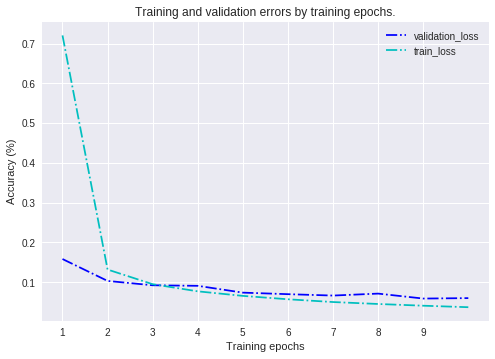

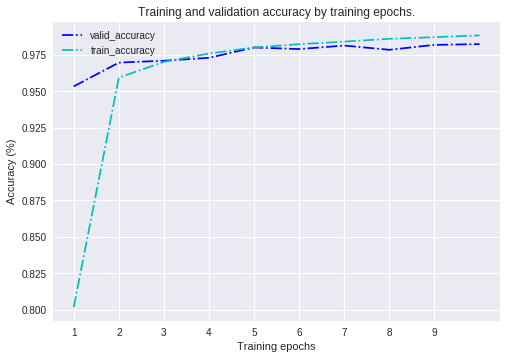

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import normalize
from keras.layers import Convolution2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
mnist=tf.keras.datasets.mnist

#download mnist data and split into train and test sets
(X_train_first, y_train_first), (X_test,y_test)=mnist.load_data();
#split train(60000) data into train(50000) and validation data(10000)
X_validation,X_train=np.split(X_train_first,[10000])
y_validation,y_train=np.split(y_train_first,[10000])
#reshape data to fit model
X_train = X_train.reshape(50000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_Validation = X_validation.reshape(10000,28,28,1)
X_train=normalize(X_train,axis=1)
X_test=normalize(X_test,axis=1)
X_Validation=normalize(X_Validation,axis=1)
# Create the model with the sequential method
classifier=Sequential()
# Step 1 - Convolution 1
classifier.add(Convolution2D(124, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(Convolution2D(124, 3, 3, activation = 'relu'))

# Step 2 - Pooling 1
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution 2
classifier.add(Convolution2D(248, 3, 3, activation = 'relu'))
classifier.add(Convolution2D(248, 3, 3, activation = 'relu'))

# Step 4 - Pooling 2
classifier.add(MaxPooling2D(pool_size = (2, 2)))
print(classifier.summary())
# Flattening to a vector column(it will be the input to our CNN)
classifier.add(Flatten())
#Adding the output layer of 10 neurones and softmax as an activation function
classifier.add(Dense(10,activation=tf.nn.softmax))
#compile the model
classifier.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#at each epoch, the model will be testes in both the trainning data and validation data and will display the accuracy
#and the lost of each type(i.e.train and validation data)
h=classifier.fit(X_train,y_train,validation_data=(X_Validation, y_validation),epochs=10)
#we evaluate our model on the test data
val_loss, val_acc=classifier.evaluate(X_test,y_test)
print(val_loss, val_acc)


#plot train and validation error
ep=np.arange(1,11,1)
train_loss=h.history["loss"]
valid_loss=h.history["val_loss"]
train_accuracy=h.history["acc"]
valid_accuracy=h.history["val_acc"]
print(valid_loss)
f = plt.figure(1)
plt.plot(ep,valid_loss,"b",linestyle='-.', marker='o',
     markerfacecolor='blue', markersize=0.002,label="validation_loss")
plt.plot(ep,train_loss,"c",linestyle='-.', marker='o',
     markerfacecolor='blue', markersize=0.002,label="train_loss")
plt.legend(loc='upper right')
plt.ylabel("Accuracy (%)")
plt.xlabel("Training epochs")
plt.title('Training and validation errors by training epochs.')
#ax.set_xticklabels([''] + v)
plt.xticks(np.arange(min(ep), max(ep), 1))
f.show()
g = plt.figure(2)
#plt.yticks(np.arange(min(v)*100, max(v)*100, 0.05))
plt.plot(ep,valid_accuracy,"b",linestyle='-.', marker='o',
     markerfacecolor='blue', markersize=0.002,label="valid_accuracy")
plt.plot(ep,train_accuracy,"c",linestyle='-.', marker='o',
     markerfacecolor='blue', markersize=0.002,label="train_accuracy")
plt.legend(loc='bottom right')
plt.ylabel("Accuracy (%)")
plt.xlabel("Training epochs")
plt.title('Training and validation accuracy by training epochs.')
#ax.set_xticklabels([''] + v)
plt.xticks(np.arange(min(ep), max(ep), 1))
g.show()
#plt.yticks(np.arange(min(v)*100, max(v)*100, 0.05))
ᐧ